In [592]:
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
start_time = time.time()

from sklearn.preprocessing import RobustScaler
from functools import reduce
from sklearn.preprocessing import StandardScaler
from keras import backend as K
import tensorflow as tf

import random
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)

Windows: 1,2,3,6,12,22,45,90

In [593]:
numberOfWindows = 1
Restriction = '90'
ep = 125
numberOfFeatures = 25

los_3

In [594]:
import pandas as pd

In [595]:
FeatureSetB2 = pd.DataFrame()
FeatureSetB3 = pd.DataFrame()
FeatureSetB4 = pd.DataFrame()

In [596]:
FeatureSetB1 = pd.read_csv('DI/DATA_Base.csv') #Split
FeatureSetB2 = pd.read_csv(f'DI/DATA_{numberOfWindows}.csv')#Train

In [597]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [598]:
FeatureSetB1.drop("Unnamed: 0",axis=1,inplace = True)
FeatureSetB1.drop("ssAgg",axis=1,inplace = True)
FeatureSetB1.drop("usAgg",axis=1,inplace = True)
FeatureSetB1.drop("isAgg",axis=1,inplace = True)
FeatureSetB1.drop("dsAgg",axis=1,inplace = True)
FeatureSetB1.drop("disAgg",axis=1,inplace = True)

FeatureSetB2.drop("Unnamed: 0",axis=1,inplace = True)
FeatureSetB2.drop("ssAgg",axis=1,inplace = True)
FeatureSetB2.drop("usAgg",axis=1,inplace = True)
FeatureSetB2.drop("isAgg",axis=1,inplace = True)
FeatureSetB2.drop("dsAgg",axis=1,inplace = True)
FeatureSetB2.drop("disAgg",axis=1,inplace = True)

FeatureSetB1 = FeatureSetB1.fillna(0)
FeatureSetB2 = FeatureSetB2.fillna(0)

FeatureMortality = pd.read_csv('DI/Sleep_Tbl.csv') #Labels
FeatureMortality.drop("Unnamed: 0",axis=1,inplace = True)
FeatureMortality.rename(columns={'ClientId':'subject_id'},inplace=True)

FeatureSetB1.sort_values(by=['subject_id'], ascending=True,inplace=True)

FeatureMortality.sort_values(by=['subject_id'], ascending=True,inplace=True)

In [599]:
subject_id = pd.DataFrame()
subject_id = FeatureSetB1.subject_id
subject_id.drop_duplicates(keep = 'first', inplace = True)
subject_id.reset_index(drop=True,inplace=True)
NumSubjects = len(subject_id)

In [600]:
X = FeatureMortality['subject_id'].isin(subject_id)
FeatureMortality = FeatureMortality[X]
FeatureMortality.sort_values(by=['subject_id'], ascending=True,inplace=True) 

In [601]:
subject_id = pd.DataFrame()
subject_id = FeatureMortality.subject_id
subject_id.drop_duplicates(keep = 'first', inplace = True)
subject_id.reset_index(drop=True,inplace=True)
NumSubjects = len(subject_id)
X = FeatureSetB1['subject_id'].isin(subject_id)
FeatureSetB1 = FeatureSetB1[X]

In [603]:
FeatureMortality.Flags[FeatureMortality.Flags == 2] = 0      

In [604]:
FeatureMortality['Flags'].value_counts()         #Chronic is 1 

0    17002
1      513
Name: Flags, dtype: int64

In [605]:
Labels = pd.DataFrame()
Labels['subject_id'] = FeatureMortality['subject_id']
Labels['Flags'] = FeatureMortality['Flags']

In [606]:
y = Labels

In [608]:
X = FeatureSetB1
X_1 = [X,y]

X_2 = reduce(lambda  left,right: pd.merge(left,right,on=['subject_id'],how='outer'), X_1)
X_2.sort_values(by=['subject_id'], ascending=True,inplace=True)

In [609]:
X_2 = X_2.dropna(subset=['Flags'])

In [610]:
subject_id = pd.DataFrame()
subject_id = X_2.subject_id
subject_id.drop_duplicates(keep = 'first', inplace = True)
subject_id.reset_index(drop=True,inplace=True)
NumSubjects = len(subject_id)

In [611]:
X = FeatureMortality['subject_id'].isin(subject_id)
FeatureMortality = FeatureMortality.reset_index(drop=True)
FeatureMortality = FeatureMortality[X]
FeatureMortality.sort_values(by=['subject_id'], ascending=True,inplace=True) 

In [612]:
X_age = X_2['age'].mean()
X_emp = X_2['emp'].mean()
X_emc = X_2['emc'].mean()
X_sleep = X_2['sleep'].mean()

In [613]:
X_2.loc[(X_2.age < X_age),  'age_Group'] = 'Young'
X_2.loc[(X_2.age >= X_age),  'age_Group'] = 'Old'

X_2.loc[(X_2.emp < X_emp),  'emp_Group'] = 'Low'
X_2.loc[(X_2.emp >= X_emp),  'emp_Group'] = 'High'

X_2.loc[(X_2.emc < X_emc),  'emc_Group'] = 'Low'
X_2.loc[(X_2.emc >= X_emc),  'emc_Group'] = 'High'

X_2.loc[(X_2.sleep < X_sleep),  'sleep_Group'] = 'Low'
X_2.loc[(X_2.sleep >= X_sleep),  'sleep_Group'] = 'High'

In [614]:
X_2['Flags'].value_counts()

0.0    16755
1.0      510
Name: Flags, dtype: int64

In [615]:
X_2['age_Group'].value_counts()

Young    9111
Old      8154
Name: age_Group, dtype: int64

In [616]:
X_2['emp_Group'].value_counts()

Low     13196
High     4069
Name: emp_Group, dtype: int64

In [617]:
X_2['emc_Group'].value_counts()

Low     13840
High     3425
Name: emc_Group, dtype: int64

In [618]:
X_2['sleep_Group'].value_counts()

Low     13347
High     3918
Name: sleep_Group, dtype: int64

In [619]:
X = FeatureSetB1

X_train1, X_test = train_test_split(X_2, test_size=0.25, stratify=X_2[['Flags']], shuffle=True,random_state=42)#,'age_Group','emp_Group','emc_Group','sleep_Group']]#,'AIDS','MetaStatic','Hematologic'#,'GCSEyes']]

In [620]:
X_train1['Flags'].value_counts()

0.0    12566
1.0      382
Name: Flags, dtype: int64

In [621]:
X_train1['sleep_Group'].value_counts()

Low     9976
High    2972
Name: sleep_Group, dtype: int64

In [622]:
X_train1['emc_Group'].value_counts()

Low     10343
High     2605
Name: emc_Group, dtype: int64

In [623]:
X_train1['emp_Group'].value_counts()

Low     9860
High    3088
Name: emp_Group, dtype: int64

In [624]:
X_train1['age_Group'].value_counts()

Young    6875
Old      6073
Name: age_Group, dtype: int64

In [625]:
X_train, X_val = train_test_split(X_train1, test_size=0.2, random_state=42, stratify=X_train1[['Flags']], shuffle=True)#,'age_Group','emp_Group','emc_Group','sleep_Group']], shuffle=True)#, shuffle=True)#,'GCSEyes']],

In [626]:
X_test['Flags'].value_counts()

0.0    4189
1.0     128
Name: Flags, dtype: int64

In [627]:
X_val['Flags'].value_counts()

0.0    2514
1.0      76
Name: Flags, dtype: int64

In [628]:
X_train['Flags'].value_counts()

0.0    10052
1.0      306
Name: Flags, dtype: int64

In [629]:
Subject_Test = pd.DataFrame()
Subject_Test = X_test.subject_id

Subject_Train = pd.DataFrame()
Subject_Train = X_train.subject_id

Subject_Val = pd.DataFrame()
Subject_Val = X_val.subject_id

In [630]:
X = FeatureMortality['subject_id'].isin(Subject_Train)
y_train = FeatureMortality[X]

X = FeatureMortality['subject_id'].isin(Subject_Test)
y_test = FeatureMortality[X]

X = FeatureMortality['subject_id'].isin(Subject_Val)
y_val = FeatureMortality[X]


In [631]:
y_test.sort_values(by=['subject_id'], ascending=True,inplace=True) 

In [632]:
X = FeatureSetB2['subject_id'].isin(Subject_Train)
X_train = FeatureSetB2[X]


X = FeatureSetB2['subject_id'].isin(Subject_Test)
X_test = FeatureSetB2[X]


X = FeatureSetB2['subject_id'].isin(Subject_Val)
X_val = FeatureSetB2[X]

In [633]:
Train_shape = X_train.shape
Test_shape = X_test.shape
Val_shape = X_val.shape

In [634]:

X_train.drop("subject_id",axis=1,inplace = True)


X_test.drop("subject_id",axis=1,inplace = True)


X_val.drop("subject_id",axis=1,inplace = True)

In [635]:
X_train = X_train.to_numpy()

X_test = X_test.to_numpy()

X_val = X_val.to_numpy()

In [636]:
X_train = X_train.reshape(int(Train_shape[0]/numberOfWindows),numberOfWindows*numberOfFeatures)
X_test = X_test.reshape(int(Test_shape[0]/numberOfWindows),numberOfWindows*numberOfFeatures)
X_val = X_val.reshape(int(Val_shape[0]/numberOfWindows),numberOfWindows*numberOfFeatures)

In [637]:
X_train4 = X_train

X_test4 = X_test

X_val4 = X_val

In [638]:
y_train = y_train['Flags']
y_train = y_train.to_numpy()
y_train = y_train.flatten()

y_test = y_test['Flags']
y_test = y_test.to_numpy()
y_test = y_test.flatten()

y_val = y_val['Flags']
y_val = y_val.to_numpy()
y_val = y_val.flatten()

Testing LR

In [639]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Activation
from sklearn import metrics
from keras.layers import LSTM
import tensorflow as tf
import sys
mod=sys.modules[__name__]

In [640]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_f1', patience = 35, mode='max',restore_best_weights=True)

In [641]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score



acc_score = []
re_score = []
pre_score = []
history_1 = []
f_score = []
acc_macro_score = []

In [642]:
import warnings
warnings.filterwarnings("ignore")

In [643]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

In [644]:
numberOfFeatures2 = X_test4.shape[1]

In [647]:
minority_size = sum(y_train.astype(int) == 1)
majority_size = int(minority_size * 5)

In [648]:
from tensorflow.keras.backend import epsilon

def weighted_cross_entropy(class_weight=(0.2, 0.8)):
    """
    Returns a weighted cross-entropy loss function, considering the given class weights.
    """
    class_weight = tf.constant(class_weight)

    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        y_pred = tf.clip_by_value(y_pred, epsilon(), 1. - epsilon())

        cross_entropy_loss = - y_true * tf.math.log(y_pred) * class_weight[1] - \
                             (1.0 - y_true) * tf.math.log(1.0 - y_pred) * class_weight[0]

        loss = tf.reduce_mean(cross_entropy_loss)

        return loss

    return loss

In [649]:
custom_loss = weighted_cross_entropy(class_weight=(0.5, 10))

In [650]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

scaler1 = StandardScaler().fit(X_train4)
scaler2 = StandardScaler().fit(X_test4)
scaler3 = StandardScaler().fit(X_val4)

X_train4 = scaler1.transform(X_train4)
X_test4 = scaler2.transform(X_test4)
X_val4 = scaler3.transform(X_val4)

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train4R, y_trainR = X_train4, y_train


for x in range(40):

    model = Sequential()
    model.add(tf.keras.Input(shape=(numberOfFeatures2,))) #(numberOfFeatures,)

    model.add(Dense(128))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.summary()


    opt = tf.keras.optimizers.legacy.Adam(learning_rate= 0.0001)#, decay=1e-3) #If validation is not following training in trend then the learning rate might be too high
    model.compile(loss=custom_loss,optimizer=opt, metrics=[f1])#focal_loss_custom(alpha=0.2, gamma=2) #'binary_crossentropy'#focal_loss_custom(alpha=0.25, gamma=2)


    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(zip(np.unique(y_train), class_weights))

    history = model.fit(X_train4R,y_trainR, epochs = ep,batch_size=1024,validation_data=(X_val4, y_val), callbacks=[stop_early],shuffle=True,class_weight=class_weights)#,use_multiprocessing=True
    history_1.append(history)


    y_preds = model.predict(X_test4)
    y_preds = y_preds.flatten()
    y_pred = list(map(lambda x: 0 if x<0.45 else 1, y_preds))

    y_actu = pd.Series(y_test)
    y_pred = pd.Series(y_pred)
        
    sensitivity = recall_score(y_actu, y_pred,average='macro')#,pos_label = 1, average='binary')
    precision = precision_score(y_actu, y_pred,average='macro')#,pos_label = 1, average='binary')
    f1_value = f1_score(y_actu, y_pred,average='macro')#,pos_label = 1, average='binary')
    accuracy = accuracy_score(y_actu, y_pred)

    acc_score.append(accuracy)
    re_score.append(sensitivity)
    pre_score.append(precision)
    f_score.append(f1_value)
    
    matrix = matrix2 = confusion_matrix(y_actu, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix2)
    matrix.diagonal()/matrix.sum(axis=1)
    Accuracies = matrix.diagonal()/matrix.sum(axis=1)
    Less10D = Accuracies[0]
    Greater10D = Accuracies[1]
    Accuracies = matrix.diagonal()/matrix.sum(axis=1)
    accuracy_macro = (Greater10D+Less10D)/2
    acc_macro_score.append(accuracy_macro)

Model: "sequential_318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_954 (Dense)           (None, 128)               3328      
                                                                 
 dropout_636 (Dropout)       (None, 128)               0         
                                                                 
 activation_636 (Activation  (None, 128)               0         
 )                                                               
                                                                 
 dense_955 (Dense)           (None, 64)                8256      
                                                                 
 dropout_637 (Dropout)       (None, 64)                0         
                                                                 
 activation_637 (Activation  (None, 64)                0         
 )                                                  

11/11 [==============================] - 0s 6ms/step - loss: 0.5396 - f1: 0.0682 - val_loss: 0.5138 - val_f1: 0.1693
Epoch 3/125
11/11 [==============================] - 0s 4ms/step - loss: 0.5259 - f1: 0.1153 - val_loss: 0.5015 - val_f1: 0.1971
Epoch 4/125
11/11 [==============================] - 0s 4ms/step - loss: 0.5146 - f1: 0.1472 - val_loss: 0.4896 - val_f1: 0.2135
Epoch 5/125
11/11 [==============================] - 0s 6ms/step - loss: 0.5072 - f1: 0.1873 - val_loss: 0.4787 - val_f1: 0.2335
Epoch 6/125
11/11 [==============================] - 0s 8ms/step - loss: 0.4890 - f1: 0.2193 - val_loss: 0.4685 - val_f1: 0.2355
Epoch 7/125
11/11 [==============================] - 0s 4ms/step - loss: 0.4810 - f1: 0.2186 - val_loss: 0.4586 - val_f1: 0.2477
Epoch 8/125
11/11 [==============================] - 0s 4ms/step - loss: 0.4713 - f1: 0.2337 - val_loss: 0.4488 - val_f1: 0.2493
Epoch 9/125
11/11 [==============================] - 0s 4ms/step - loss: 0.4655 - f1: 0.2332 - val_loss: 0.43

In [651]:
k = 40
avg_acc_score = sum(acc_score)/k
avg_recall_score = sum(re_score)/k
avg_precision_score = sum(pre_score)/k
avg_f1_score = sum(f_score)/k
avg_acc_macro_score = sum(acc_macro_score)/k

accuracy_macro = avg_acc_macro_score
sensitivity = avg_recall_score
precision = avg_precision_score
accuracy = avg_acc_score
f1_score = avg_f1_score

In [652]:
import math
def calculate_standard_deviation(numbers):
    n = len(numbers)
    mean = sum(numbers) / n
    variance = sum((x - mean) ** 2 for x in numbers) / n
    std_dev = math.sqrt(variance)
    return std_dev

std_acc = calculate_standard_deviation(acc_score)
std_acc_macro = calculate_standard_deviation(acc_macro_score)
std_recall = calculate_standard_deviation(re_score)
std_precision = calculate_standard_deviation(pre_score)
std_f1_score = calculate_standard_deviation(f_score)

In [653]:
sensitivity_min = min(re_score)
sensitivity_max = max(re_score)

precision_min = min(pre_score)
precision_max = max(pre_score)

accuracy_min = min(acc_score)
accuracy_max = max(acc_score)

accuracy_macro_min = min(acc_macro_score)
accuracy_macro_max = max(acc_macro_score)

f1_score_min = min(f_score)
f1_score_max = max(f_score)

In [654]:
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg Reccall : {}'.format(avg_recall_score))
print('Avg Precision : {}'.format(avg_precision_score))
print('Avg F1_score : {}'.format(avg_f1_score))
print('Avg accuracy_macro : {}'.format(avg_acc_macro_score))

Avg accuracy : 0.8655721565902246
Avg Reccall : 0.805586935071025
Avg Precision : 0.57372283224088
Avg F1_score : 0.5897568609538751
Avg accuracy_macro : 0.805586935071025


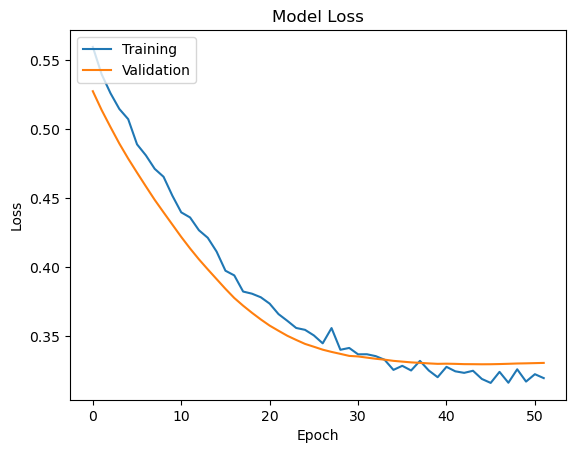

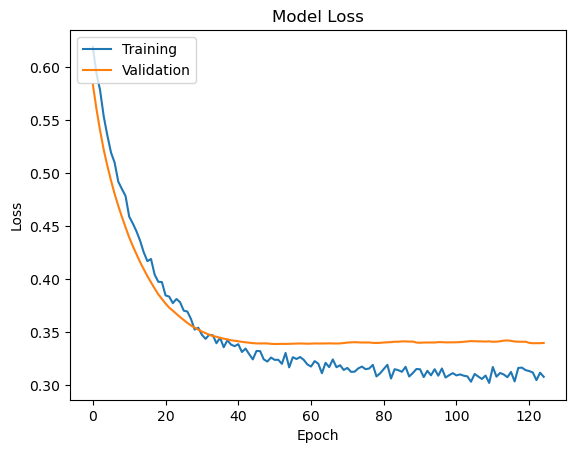

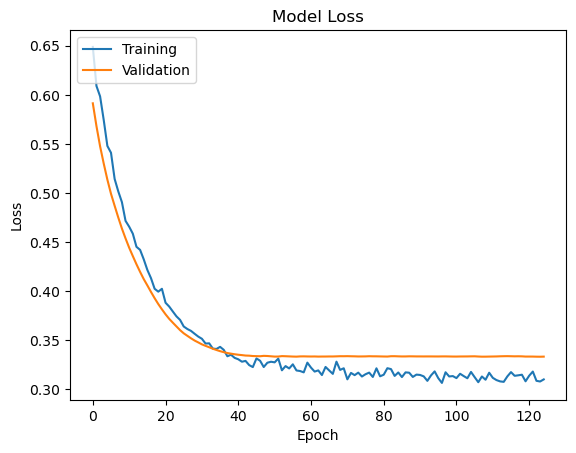

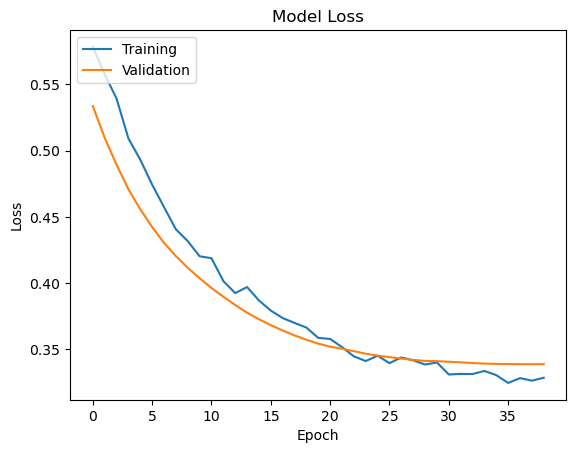

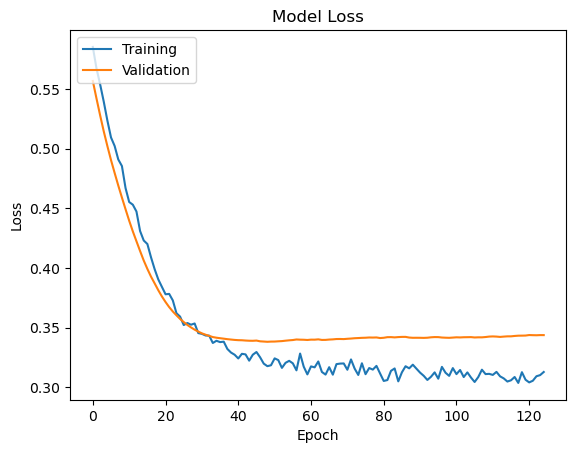

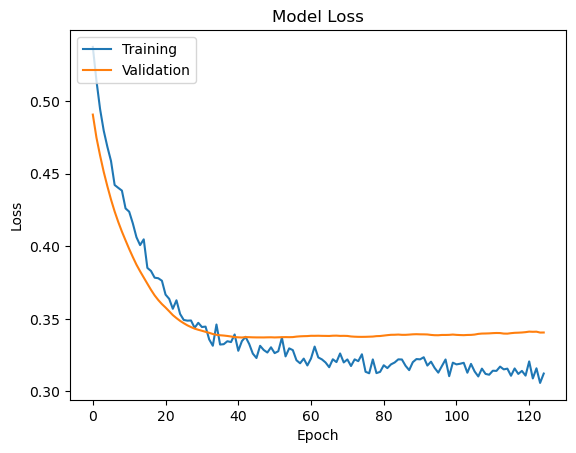

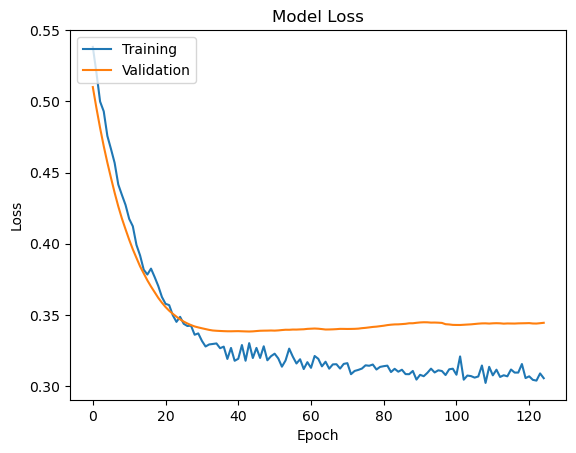

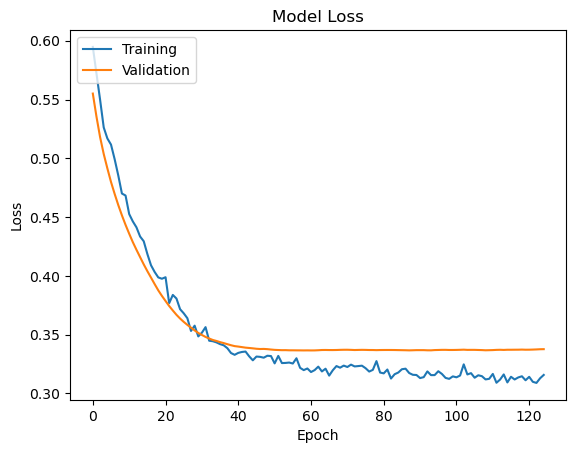

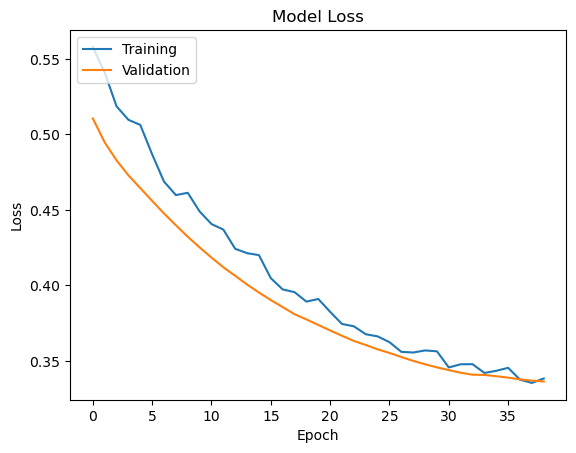

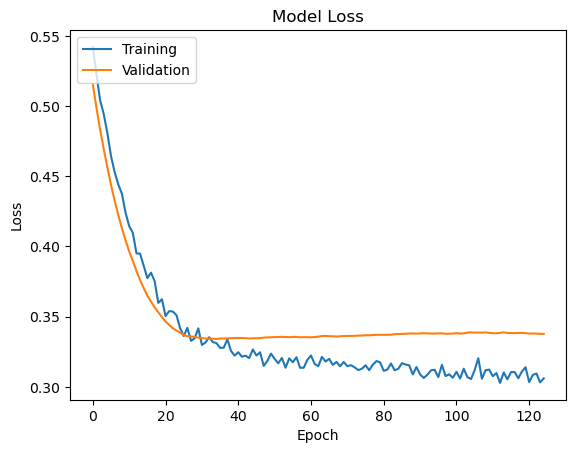

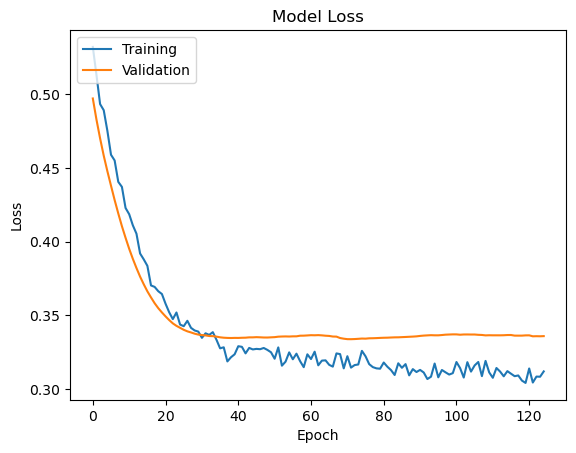

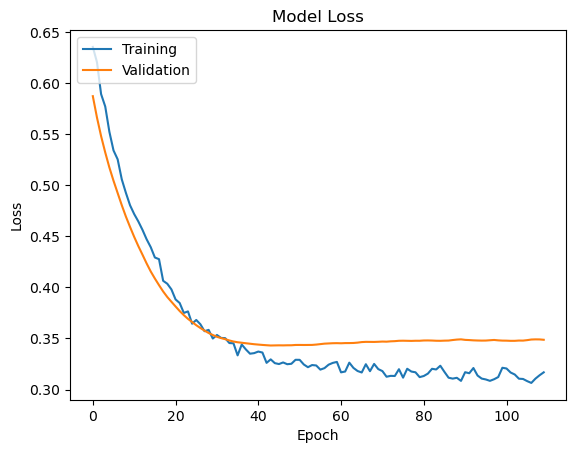

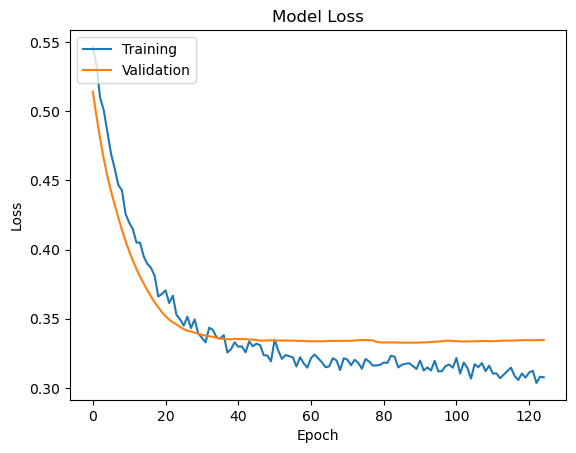

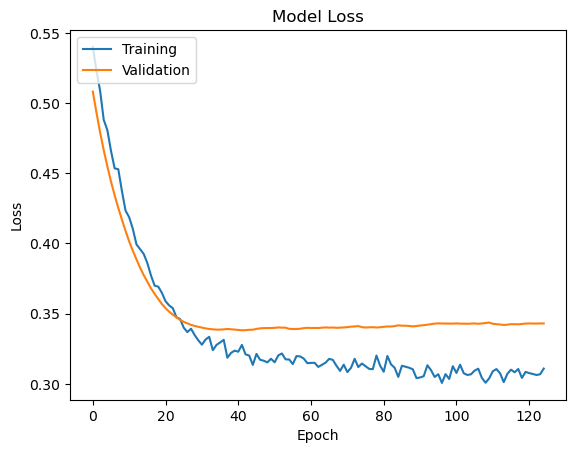

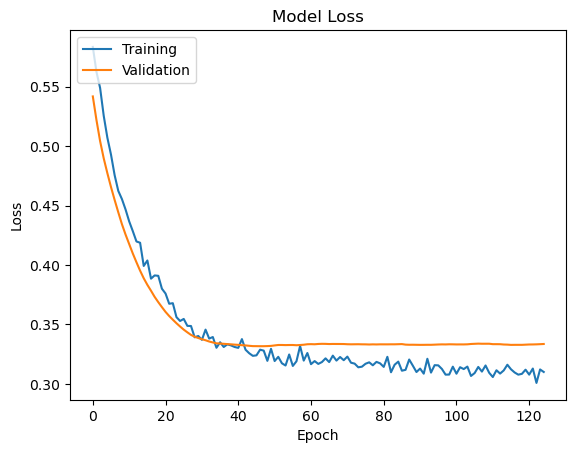

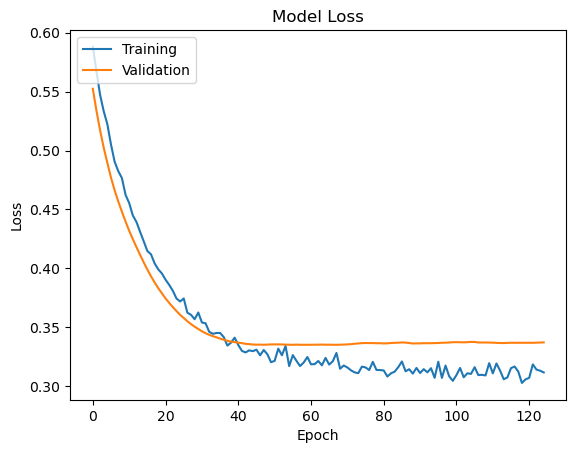

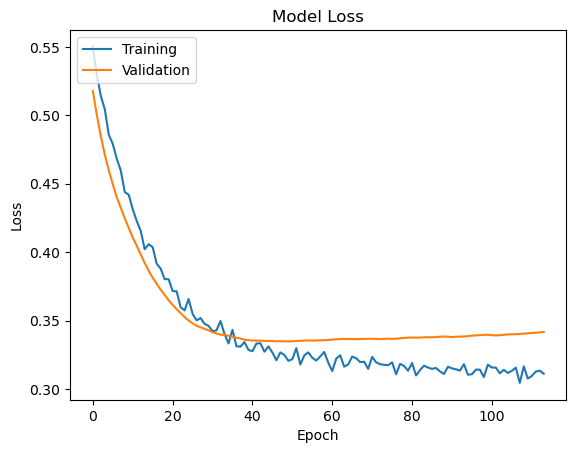

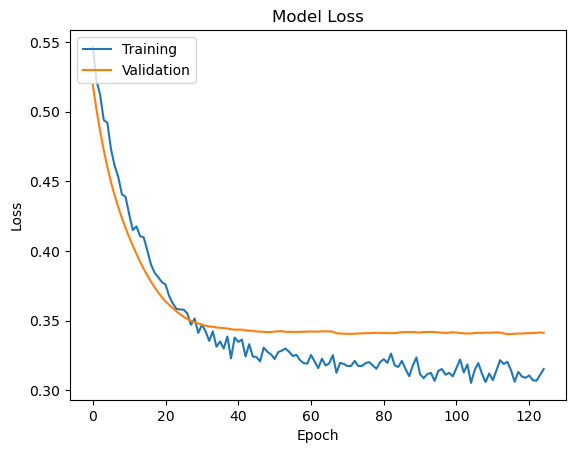

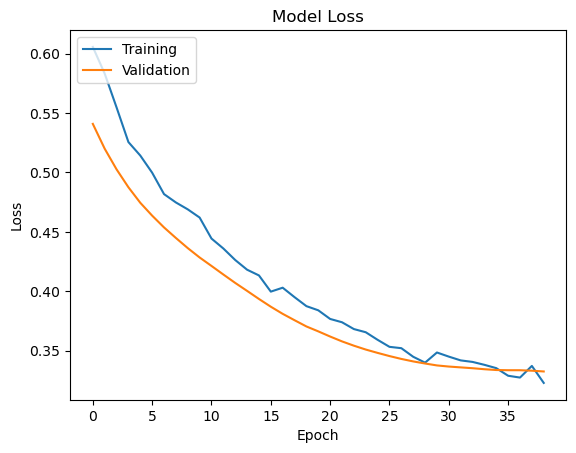

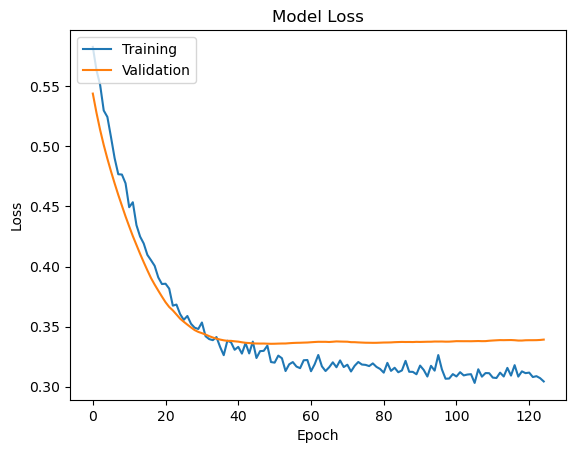

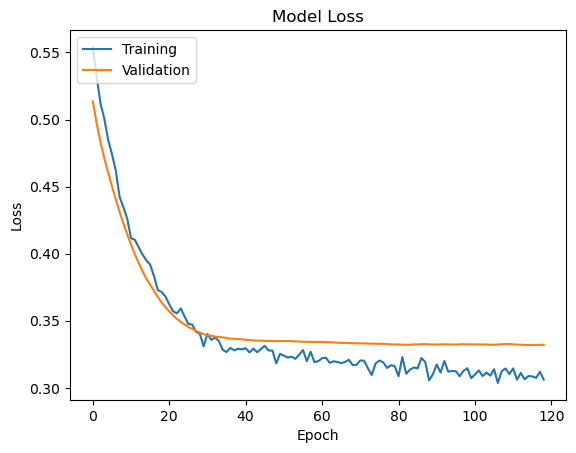

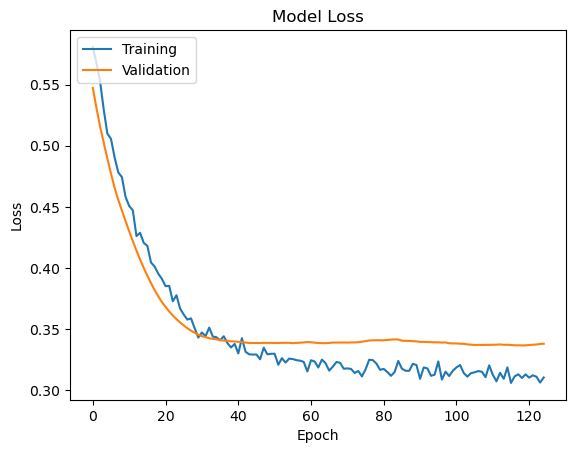

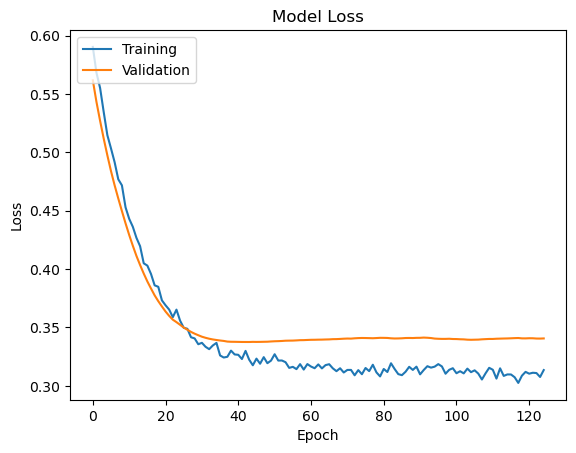

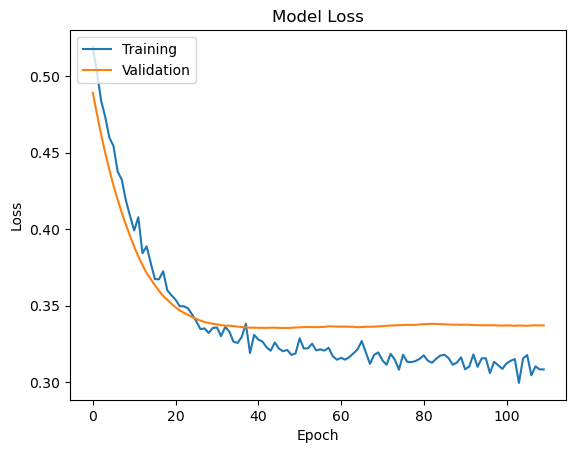

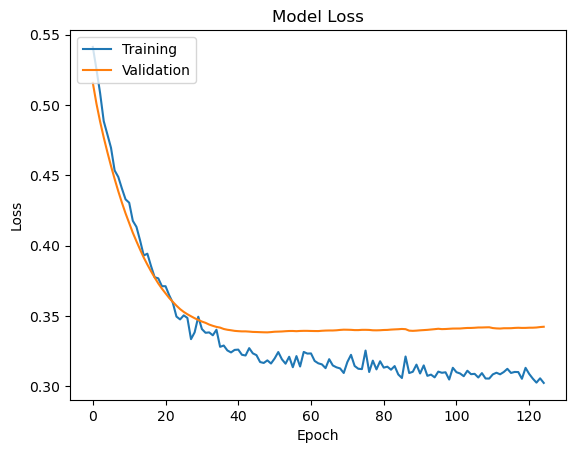

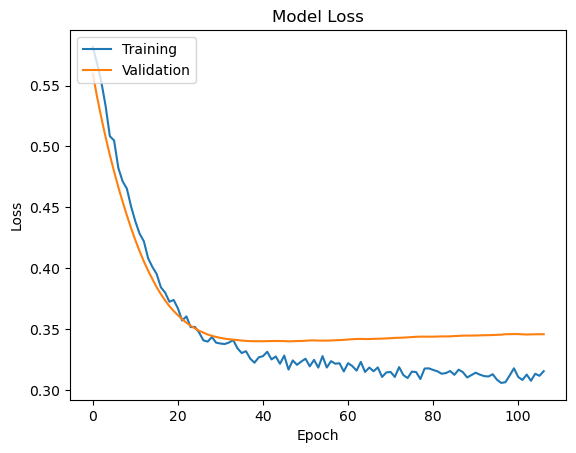

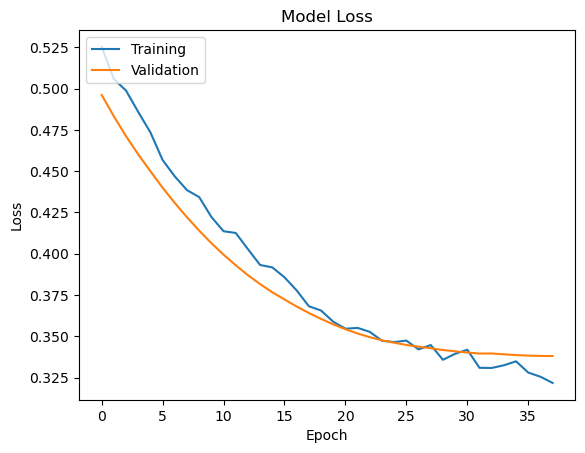

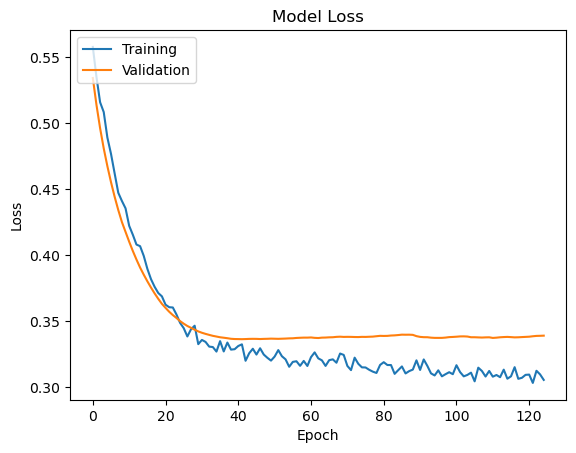

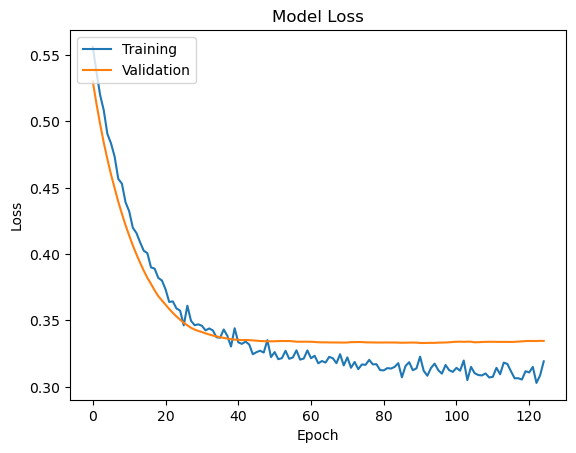

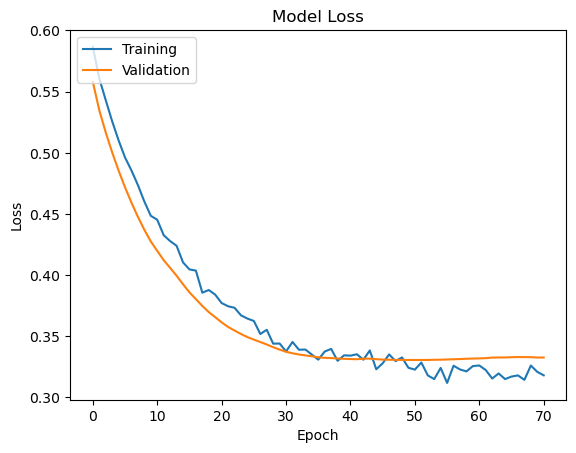

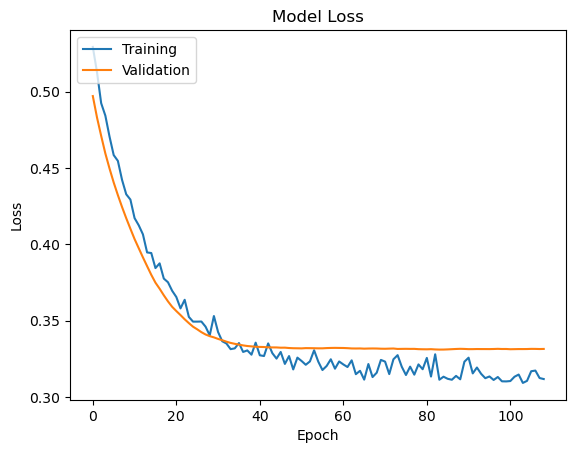

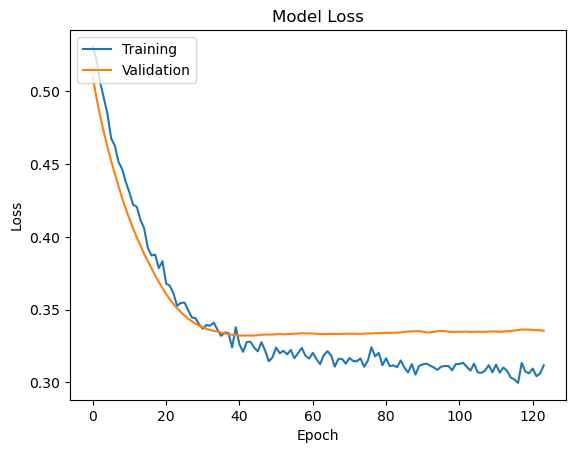

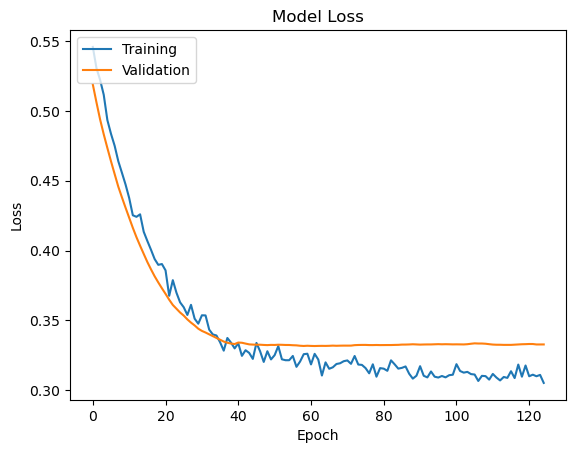

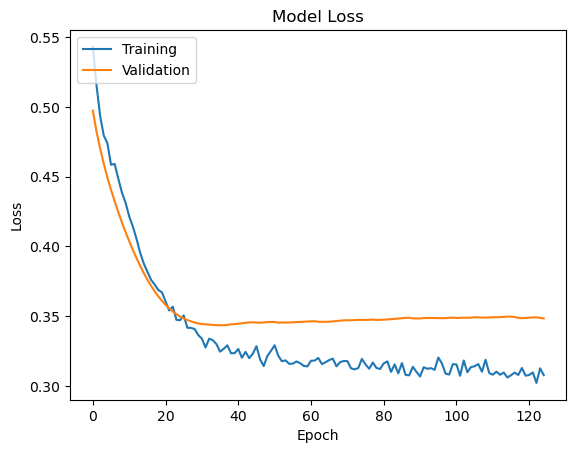

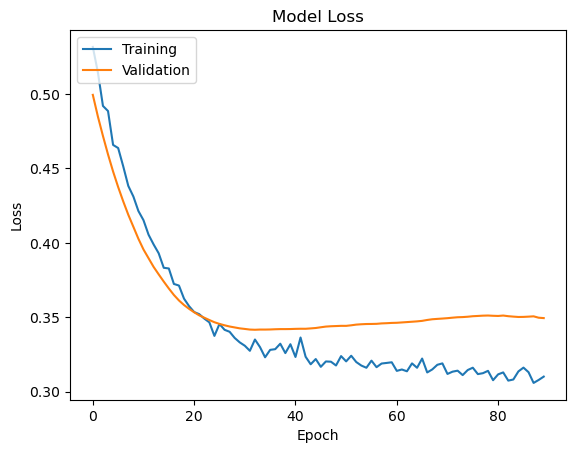

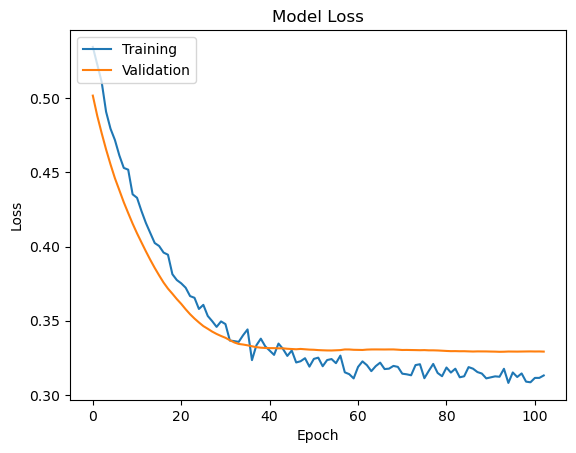

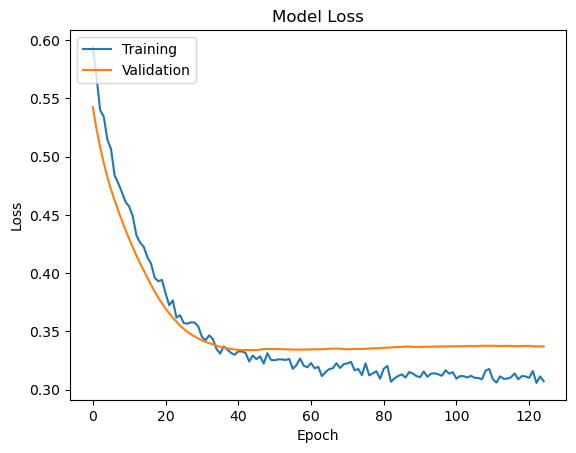

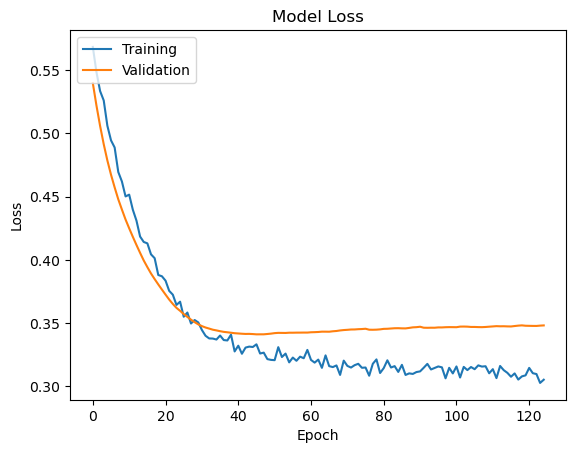

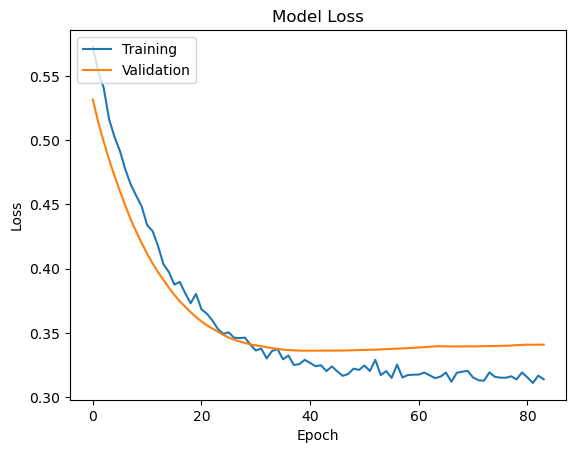

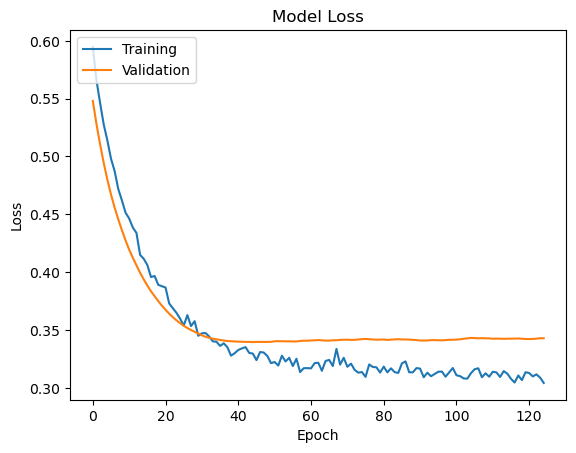

In [655]:
for history in history_1:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

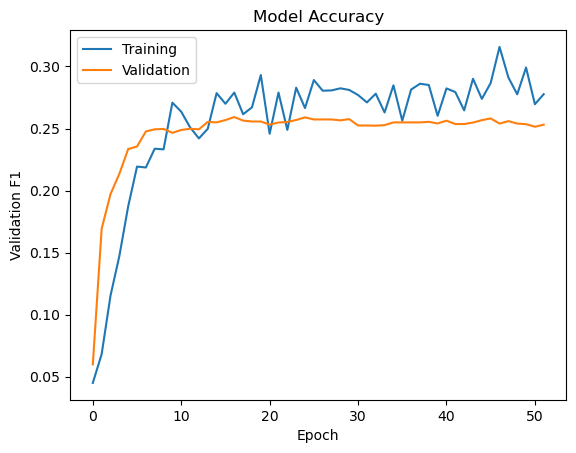

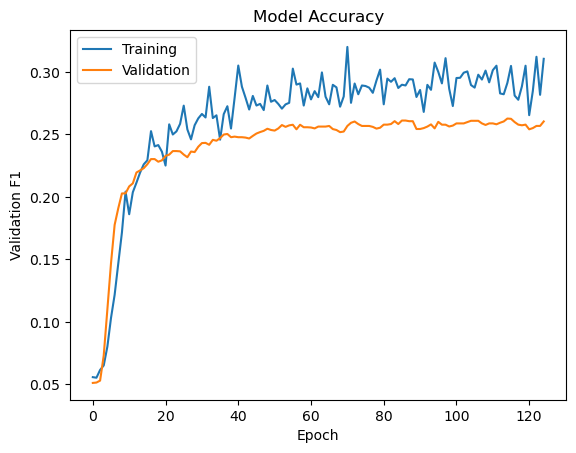

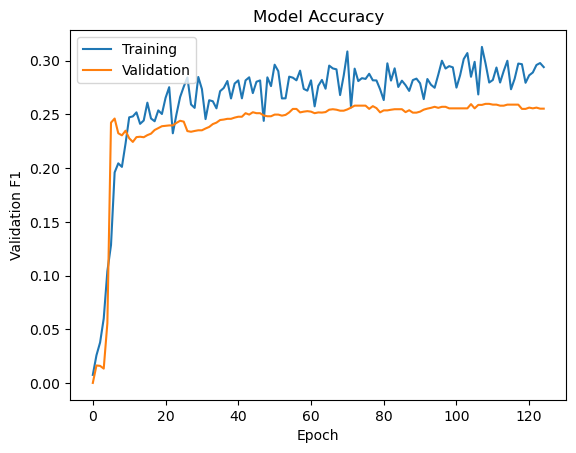

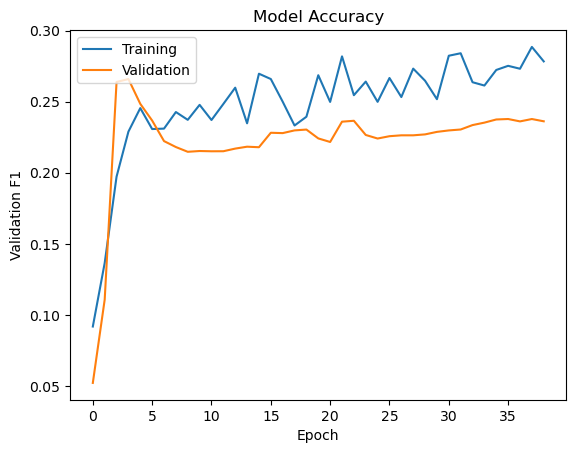

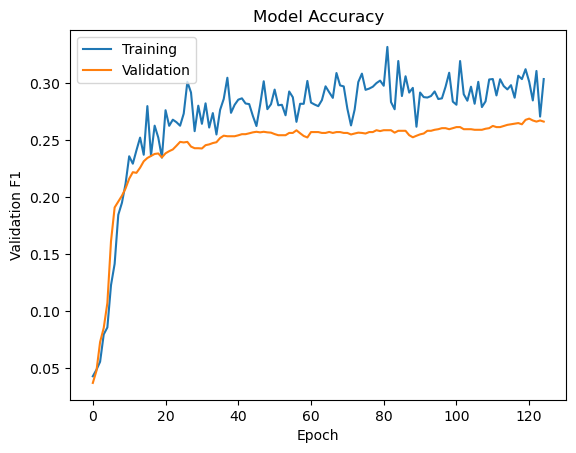

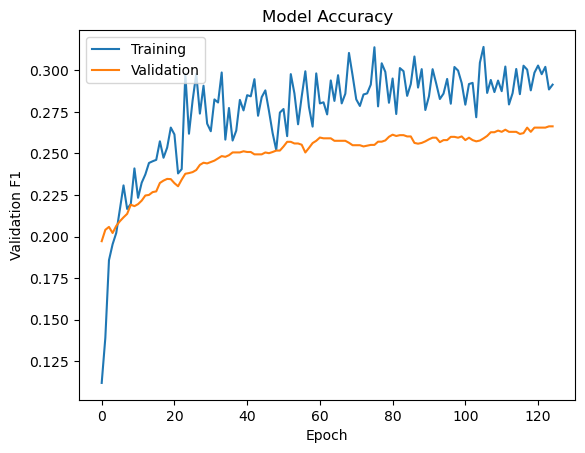

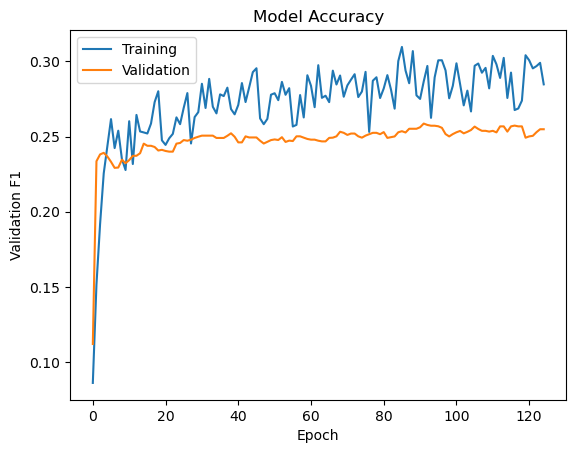

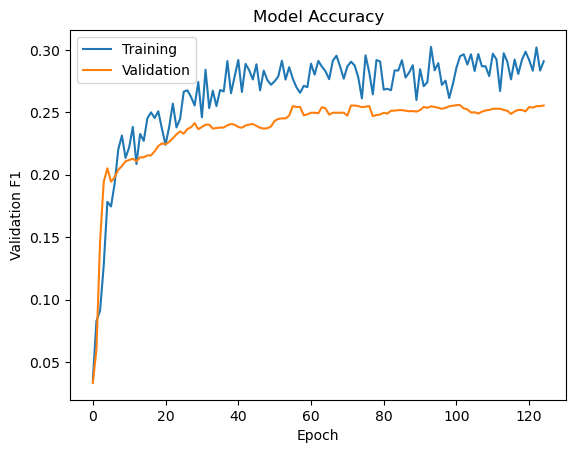

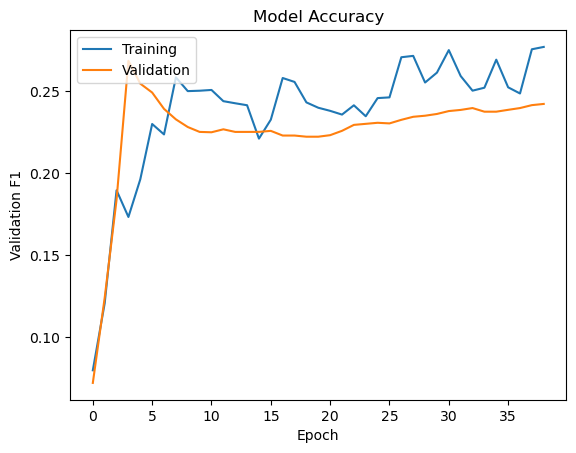

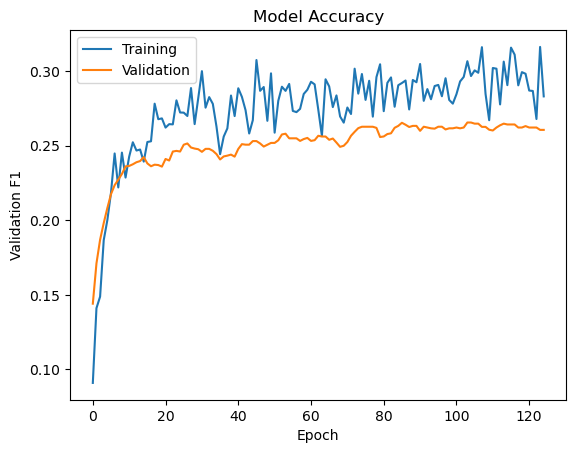

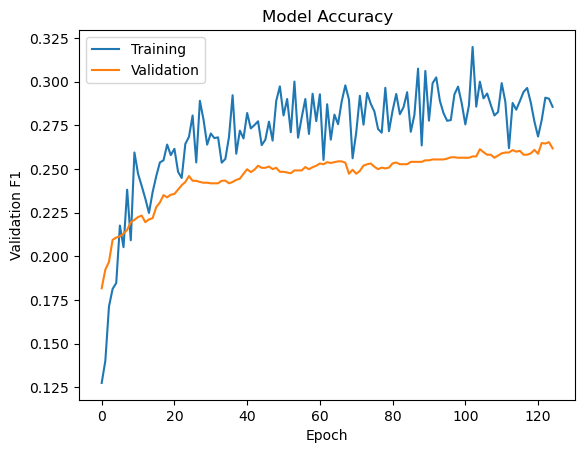

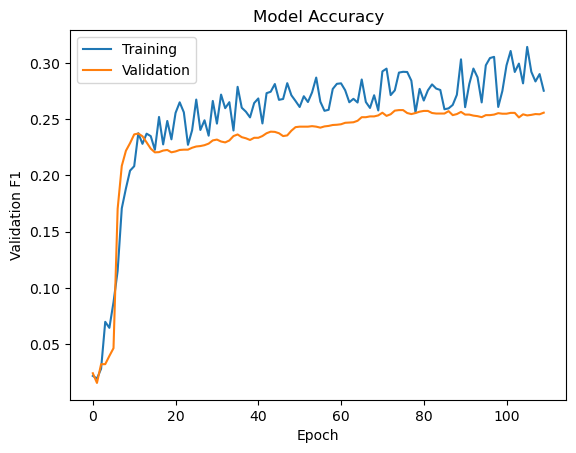

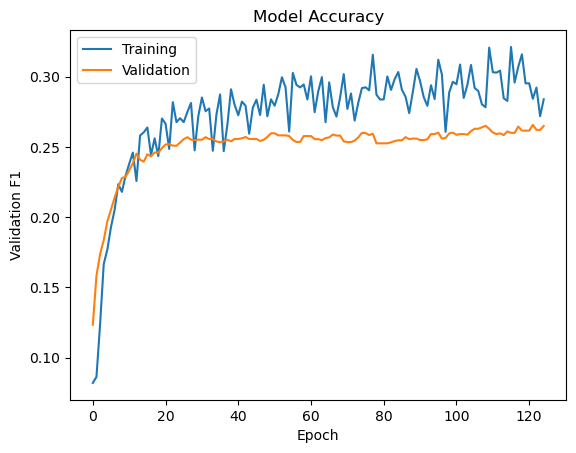

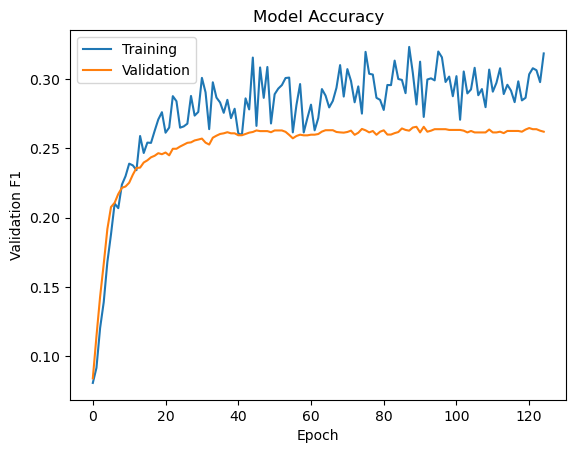

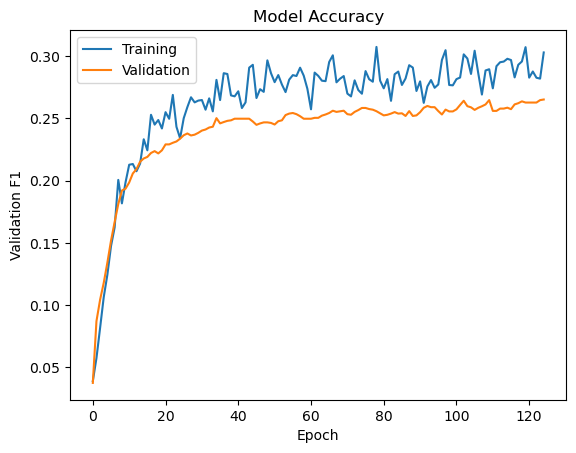

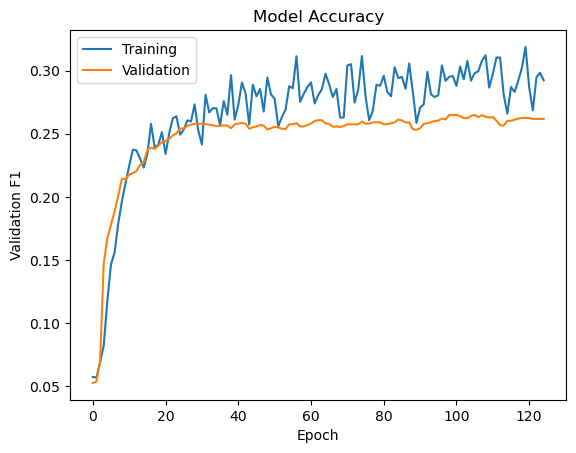

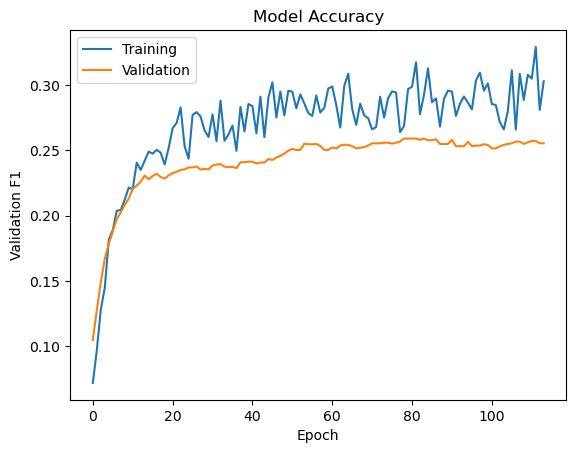

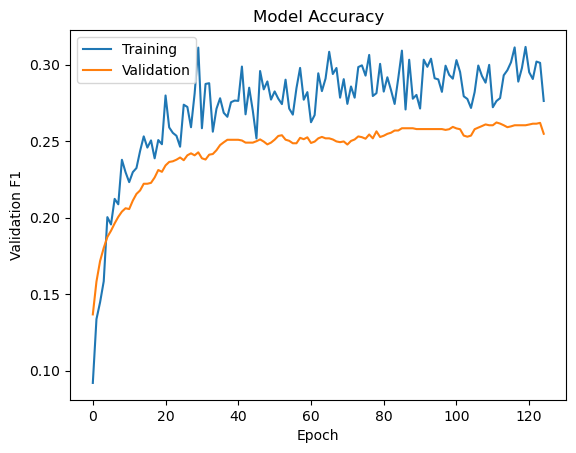

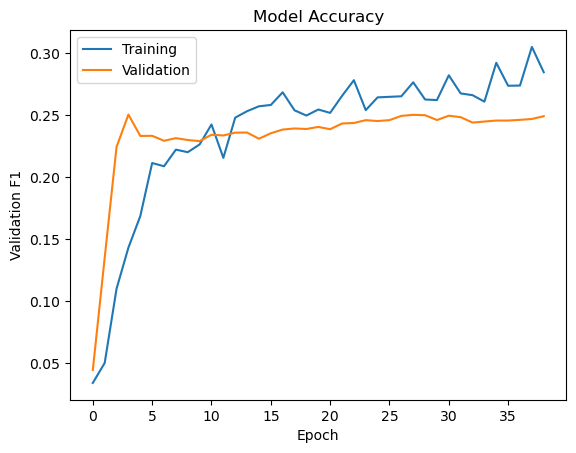

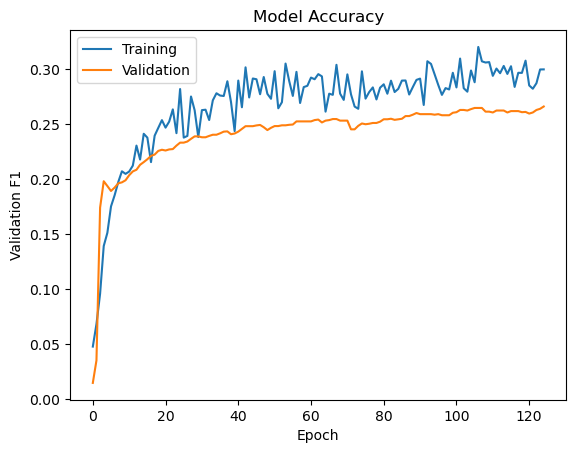

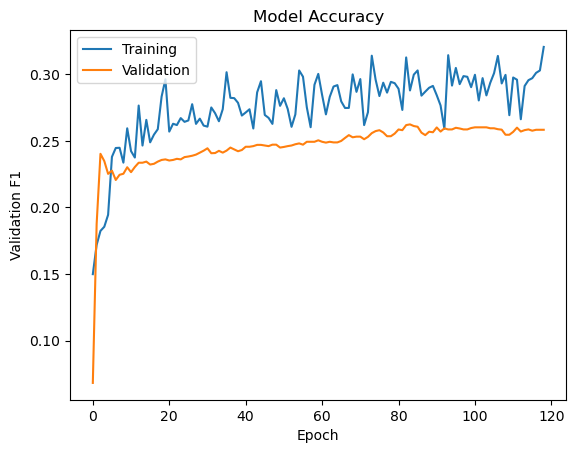

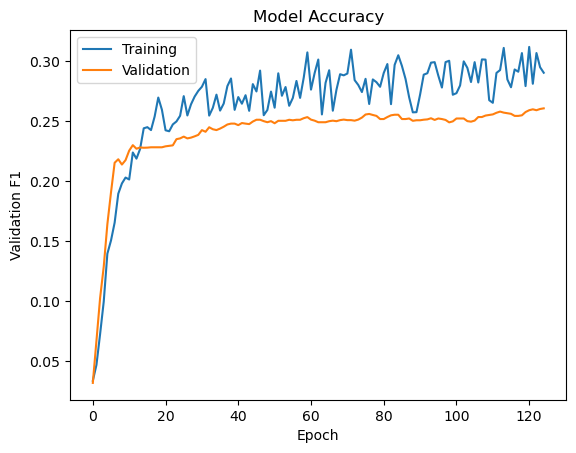

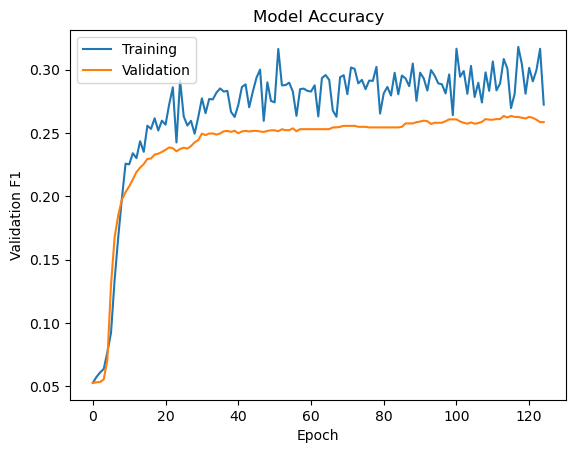

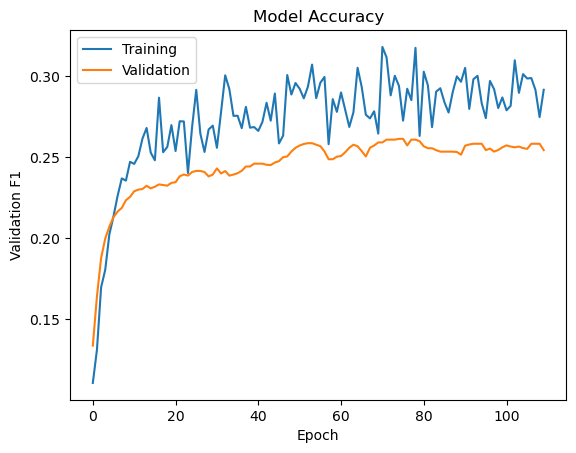

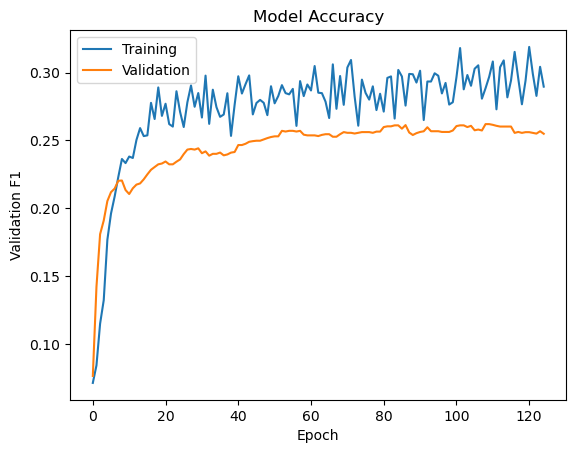

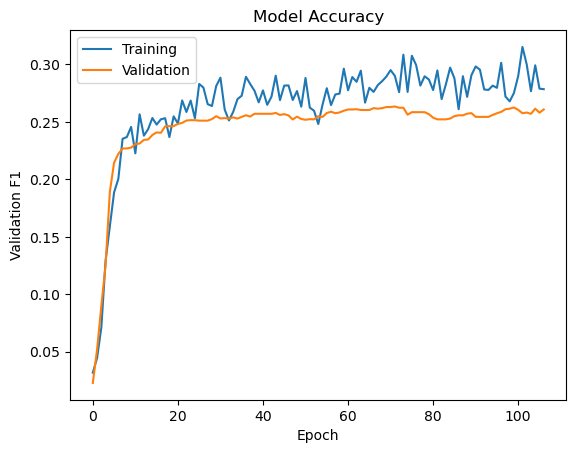

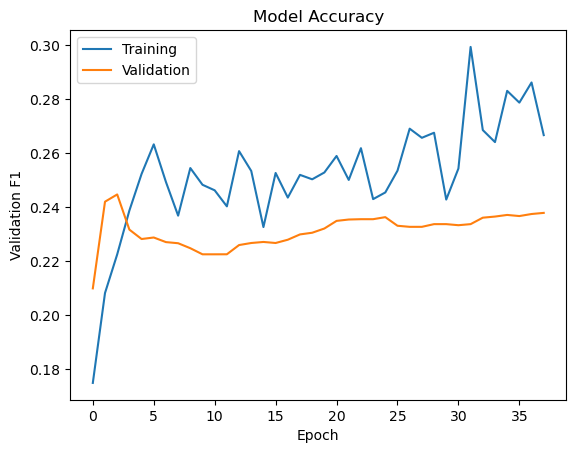

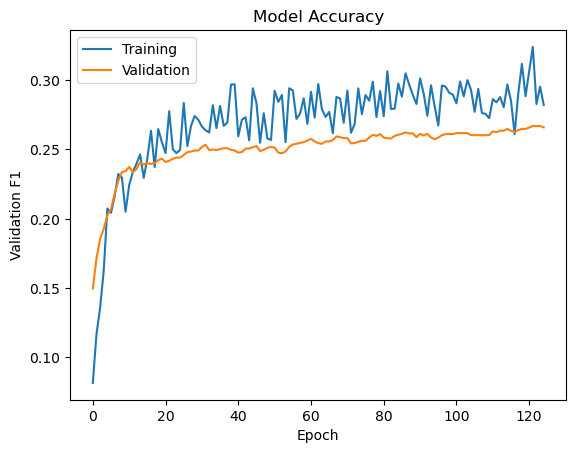

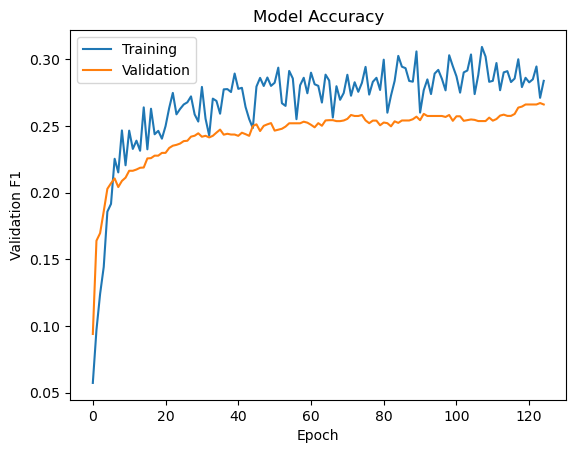

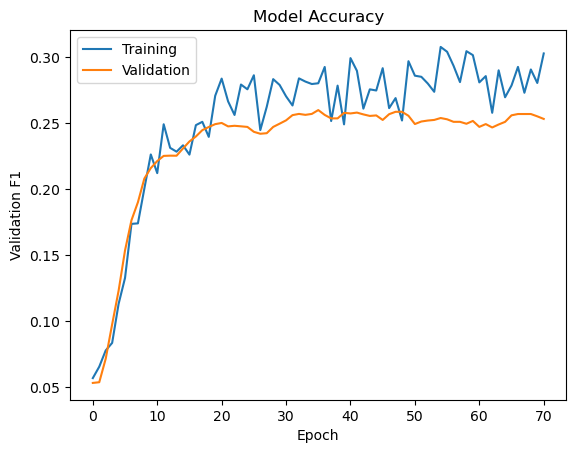

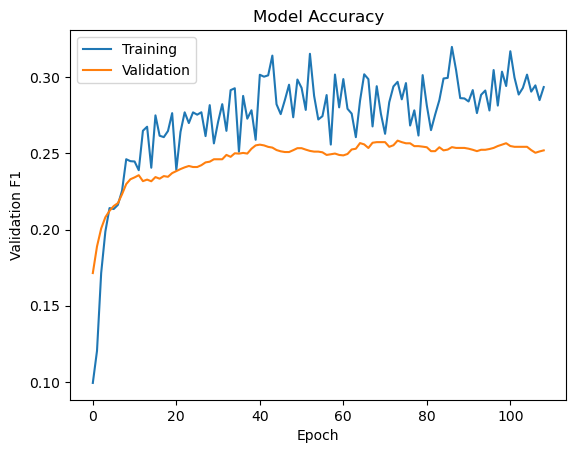

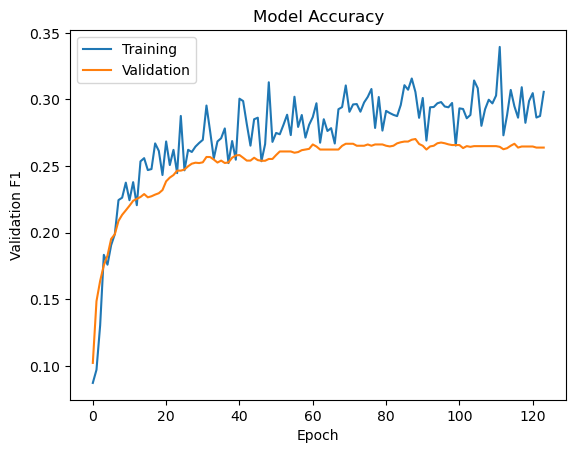

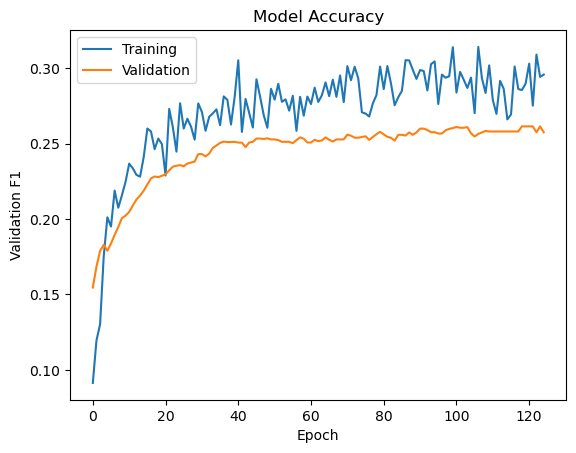

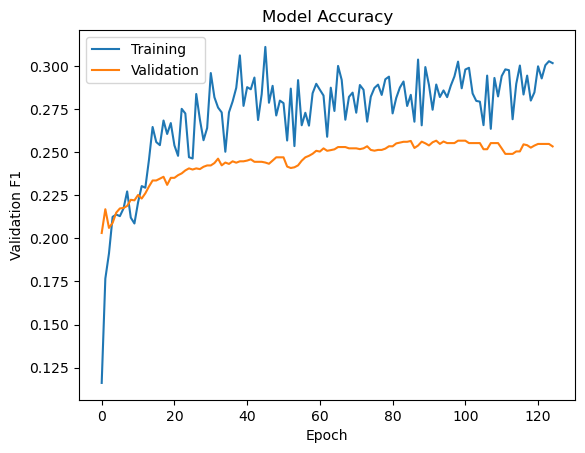

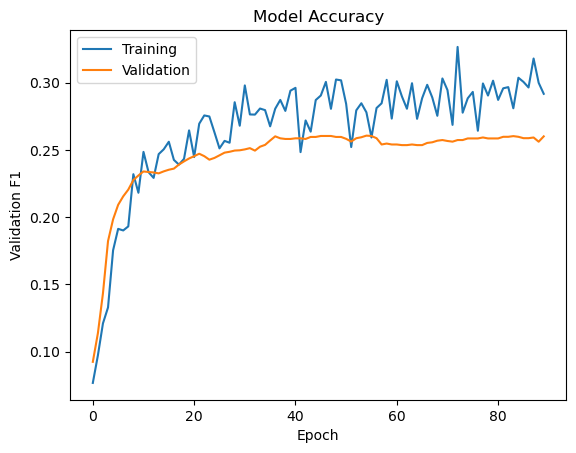

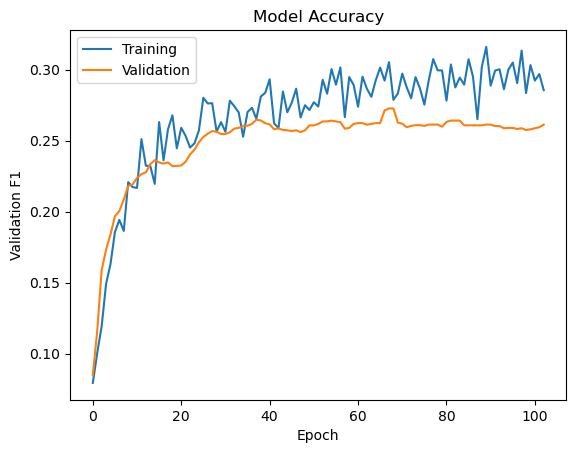

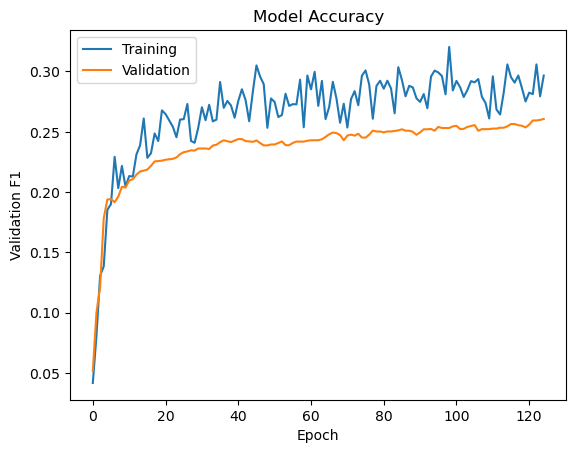

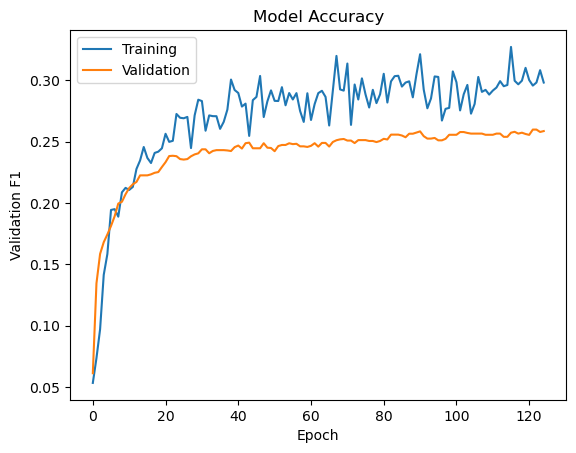

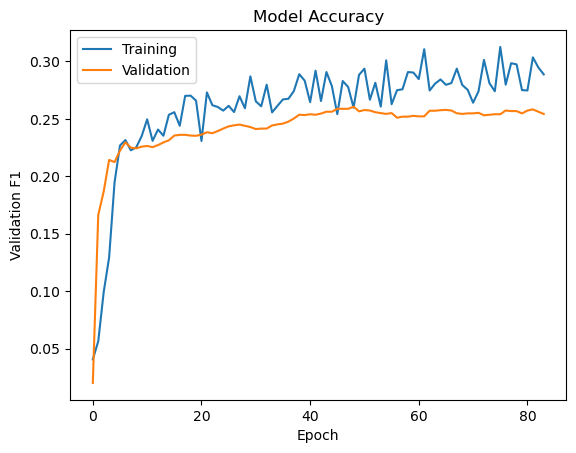

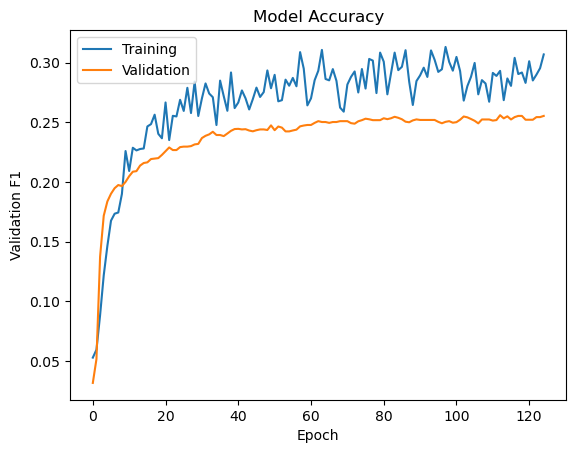

In [656]:
for history in history_1:
    plt.plot(history.history['f1'])
    plt.plot(history.history['val_f1'])
    plt.title('Model Accuracy')
    plt.ylabel('Validation F1')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

In [658]:
import csv
import os.path
from datetime import datetime
end_time = time.time()
runtime = end_time - start_time

csv_columns = ['model-type','precision','sensitivity','f1-score','accuracy','accuracy_macro','NumberOfWindows','Epochs','Run_Time','Restriction','Acc_Lesser','Acc_Greater']
dict_data = [{'model-type':'ANN', 'precision': precision,'sensitivity': sensitivity,'f1-score': f1_score,'accuracy': accuracy,'accuracy_macro': accuracy_macro,'NumberOfWindows':numberOfWindows,"Epochs":ep,'Run_Time':runtime,'Restriction' : Restriction,'Acc_Lesser':Less10D,'Acc_Greater':Greater10D}]
metric_file = "Results/Chronic_ANN_Min_FR.csv"

file_exists = os.path.isfile(metric_file)
try:
    with open(metric_file, 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        if not file_exists:
            writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error")